<a href="https://colab.research.google.com/github/moonbeam87/ESN-Research-Repo/blob/master/ESNNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
from pyESN import ESN 
%matplotlib inline

In [ ]:
data = open("drive/My Drive/ESN RESEARCH/HBANO.txt").read().split()
data = np.array(data).astype('float64')

In [ ]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 0.9
noise = .0007


esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise)

trainlen = data.size-5
print(trainlen)
future = 5
futureTotal=5
pred_tot=np.zeros(futureTotal)

for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]

1082


In [ ]:
import seaborn as sns
from matplotlib import rc
import matplotlib as mpl

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

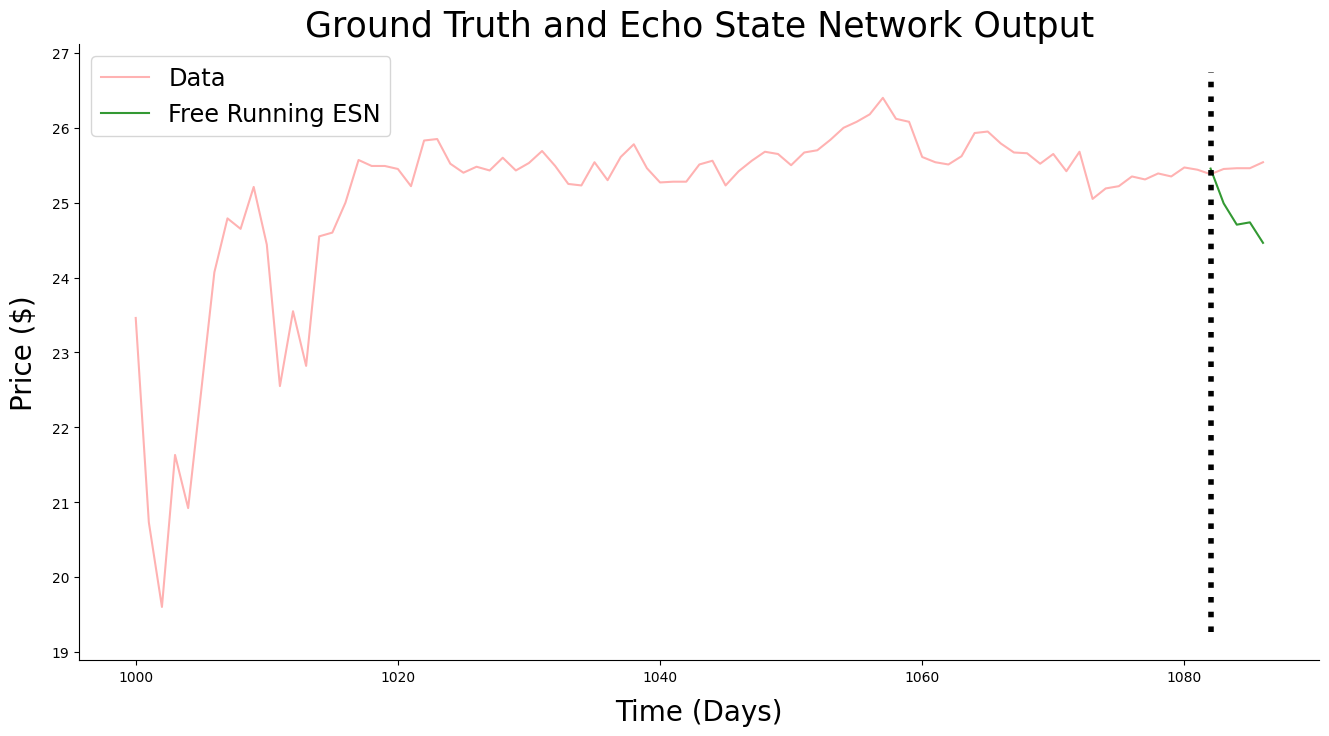

In [ ]:
mpl.style.use('default')
plt.figure(figsize=(16,8))
plt.plot(range(1000,trainlen+futureTotal),data[1000:trainlen+futureTotal],'r',label="Data", alpha=0.3)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'g',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time (Days)', fontsize=20,labelpad=10)
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()

In [ ]:
def MSE(yhat, y):
    return np.sqrt(np.mean((yhat.flatten() - y)**2))


In [ ]:
data

array([  69.13,   66.44,   65.81, ..., 3008.87, 2999.9 , 2961.97])

In [ ]:

n_reservoir= 500
sparsity   = 0.2
rand_seed  = 23
radius_set = [1.1]
noise_set = [0.0005]

data = open("drive/My Drive/ESN RESEARCH/ULTR.txt").read().split()
data = np.array(data).astype('float64')

radius_set_size  = len(radius_set)
noise_set_size = len(noise_set)

trainlen = data.size-100
future = 5
futureTotal= 100
prevTrue = data[trainlen-1]
prevESN = data[trainlen-1]
percentReturnTrue = []
percentReturnESN = []
loss = np.zeros([radius_set_size, noise_set_size])
print("initial:")
print(data[trainlen-1])
for l in range(radius_set_size):
    rho = radius_set[l]
    for j in range(noise_set_size):
        noise = noise_set[j]

        pred_tot=np.zeros(futureTotal)

        esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = rho,
          noise=noise)

        for i in range(0,futureTotal,future):
            pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
            prediction = esn.predict(np.ones(future))
            pred_tot[i:i+future] = prediction[:,0]
            true = data[trainlen+i:trainlen+i+future]
            #print(i)
            #print("Predicted: ")
            #print(prediction)
            #print("True: ")
            #print(true)
            trueEnd = true[4]
            ESNTEMP = prediction[4]
            ESNEnd = ESNTEMP[0]
            percentReturnTrue.append((trueEnd-prevTrue)/prevTrue)
            percentReturnESN.append((ESNEnd-prevESN)/prevESN)
            prevTrue = trueEnd
            prevESN = ESNEnd
        loss[l, j] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])        
        #print('rho = ', radius_set[l], ', noise = ', noise_set[j], ', MSE = ', loss[l][j] )
#print("ESN PERCENT RETURN")
#print(percentReturnESN)
print("ESN AVERAGE PERCENT RETURN")
print(sum(percentReturnESN)/len(percentReturnESN))
#print("TRUE PERCENT RETURN")
#print(percentReturnTrue)
print("TRUE AVERAGE PERCENT RETURN")
print(sum(percentReturnTrue)/len(percentReturnTrue))

initial:
1500.84


IndexError: ignored

In [ ]:
data = open("drive/My Drive/ESN RESEARCH/ULTR.txt").read().split()
data = np.array(data).astype('float64')
df = pd.DataFrame(data)
close = df[0]
r = np.diff(np.log(close))
r_mean = np.mean(r)
diff_square = [(r[i]-r_mean)**2 for i in range(0,len(r))]
std = np.sqrt(sum(diff_square)*(1.0/(len(r)-1)))
vol = std*np.sqrt(252)
print(vol)

0.029254440750871736


In [ ]:
df = pd.read_csv("es3.csv")
df.head()

,Share,MSE,Volatility,Avg. 5 Day Percent Return (ESN),True Avg. 5 Day Percent Return,Unnamed: 5
0,AAPL,15.7000,0.63192,1.5750,1.5520,5.253
1,ALACU,0.3240,0.14740,0.3113,0.0482,NaN
2,AMH,1.3720,0.22340,0.0045,0.2751,NaN
3,CABO,120.5750,0.27090,0.6078,0.9158,NaN
4,CIGI,6.4264,0.39490,-0.6353,-0.7815,NaN


{'boxes': [<matplotlib.lines.Line2D at 0x7f866b099cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f866b028710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f866b0301d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f866b028e10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f866b099fd0>,
  <matplotlib.lines.Line2D at 0x7f866b030c50>]}

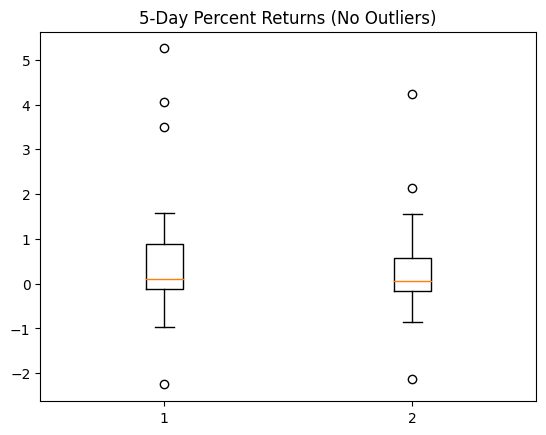

In [ ]:
ESNData = [df['Avg. 5 Day Percent Return (ESN)'], df['True Avg. 5 Day Percent Return']]
fig1, ax1 = plt.subplots()
ax1.set_title('5-Day Percent Returns (No Outliers)')
ax1.boxplot(ESNData)

In [ ]:
!pip3 install tabloo

In [ ]:
import tabloo

In [ ]:
df

,Share,MSE,Volatility,Avg. 5 Day Percent Return (ESN),True Avg. 5 Day Percent Return,Unnamed: 5
0,AAPL,15.7000,0.63192,1.5750,1.5520,5.253
1,ALACU,0.3240,0.14740,0.3113,0.0482,NaN
2,AMH,1.3720,0.22340,0.0045,0.2751,NaN
3,CABO,120.5750,0.27090,0.6078,0.9158,NaN
4,CIGI,6.4264,0.39490,-0.6353,-0.7815,NaN
5,CPAA,0.5420,0.23160,0.8962,0.3022,NaN
6,ETP,1.2290,0.43140,1.1650,0.6545,NaN
7,EWH,0.7790,0.26340,-0.1559,-0.1923,NaN
8,FDNI,4.0000,0.30000,3.4950,2.1270,NaN
9,FMN,0.5990,0.17110,-0.0263,0.0213,NaN


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df.head()

,Share,MSE,Volatility,Avg. 5 Day Percent Return (ESN),True Avg. 5 Day Percent Return,Unnamed: 5
0,AAPL,15.7000,0.63192,1.5750,1.5520,5.253
1,ALACU,0.3240,0.14740,0.3113,0.0482,NaN
2,AMH,1.3720,0.22340,0.0045,0.2751,NaN
3,CABO,120.5750,0.27090,0.6078,0.9158,NaN
4,CIGI,6.4264,0.39490,-0.6353,-0.7815,NaN


In [ ]:
df.describe()

,MSE,Volatility,Avg. 5 Day Percent Return (ESN),True Avg. 5 Day Percent Return,Unnamed: 5
count,24.000000,24.000000,24.000000,24.000000,1.000
mean,13.941679,0.303697,0.584796,0.276554,5.253
std,31.038247,0.160198,1.635682,1.193964,NaN
min,0.324000,0.029200,-2.253000,-2.139000,5.253
25%,0.734000,0.204475,-0.113300,-0.160125,5.253
50%,1.659450,0.269150,0.113600,0.065500,5.253
75%,6.244600,0.406725,0.875575,0.566225,5.253
max,120.575000,0.631920,5.253000,4.232000,5.253


In [ ]:
df = df.set_index('Share')

In [ ]:
df

,MSE,Volatility,Avg. 5 Day Percent Return (ESN),True Avg. 5 Day Percent Return,Unnamed: 5
Share,,,,,
AAPL,15.7000,0.63192,1.5750,1.5520,5.253
ALACU,0.3240,0.14740,0.3113,0.0482,NaN
AMH,1.3720,0.22340,0.0045,0.2751,NaN
CABO,120.5750,0.27090,0.6078,0.9158,NaN
CIGI,6.4264,0.39490,-0.6353,-0.7815,NaN
CPAA,0.5420,0.23160,0.8962,0.3022,NaN
ETP,1.2290,0.43140,1.1650,0.6545,NaN
EWH,0.7790,0.26340,-0.1559,-0.1923,NaN
FDNI,4.0000,0.30000,3.4950,2.1270,NaN


In [ ]:
array1 = df['Volatility'].to_numpy()

In [ ]:
array2 = df['Avg. 5 Day Percent Return (ESN)'].to_numpy()

In [ ]:
array1

array([0.63192, 0.1474 , 0.2234 , 0.2709 , 0.3949 , 0.2316 , 0.4314 ,
       0.2634 , 0.3    , 0.1711 , 0.2323 , 0.4493 , 0.0508 , 0.3493 ,
       0.1617 , 0.2674 , 0.1322 , 0.5999 , 0.3989 , 0.2156 , 0.3585 ,
       0.5474 , 0.4302 , 0.0292 ])

In [ ]:
array2

array([ 1.575e+00,  3.113e-01,  4.500e-03,  6.078e-01, -6.353e-01,
        8.962e-01,  1.165e+00, -1.559e-01,  3.495e+00, -2.630e-02,
        2.340e-02, -9.769e-01,  7.620e-02,  2.667e-01,  5.253e+00,
       -8.271e-01, -9.910e-02, -2.219e-01, -2.253e+00,  5.590e-01,
        1.510e-01,  4.056e+00,  8.687e-01, -7.820e-02])

In [ ]:
combined = np.column_stack((array1, array2))

In [ ]:
combined

array([[ 6.3192e-01,  1.5750e+00],
       [ 1.4740e-01,  3.1130e-01],
       [ 2.2340e-01,  4.5000e-03],
       [ 2.7090e-01,  6.0780e-01],
       [ 3.9490e-01, -6.3530e-01],
       [ 2.3160e-01,  8.9620e-01],
       [ 4.3140e-01,  1.1650e+00],
       [ 2.6340e-01, -1.5590e-01],
       [ 3.0000e-01,  3.4950e+00],
       [ 1.7110e-01, -2.6300e-02],
       [ 2.3230e-01,  2.3400e-02],
       [ 4.4930e-01, -9.7690e-01],
       [ 5.0800e-02,  7.6200e-02],
       [ 3.4930e-01,  2.6670e-01],
       [ 1.6170e-01,  5.2530e+00],
       [ 2.6740e-01, -8.2710e-01],
       [ 1.3220e-01, -9.9100e-02],
       [ 5.9990e-01, -2.2190e-01],
       [ 3.9890e-01, -2.2530e+00],
       [ 2.1560e-01,  5.5900e-01],
       [ 3.5850e-01,  1.5100e-01],
       [ 5.4740e-01,  4.0560e+00],
       [ 4.3020e-01,  8.6870e-01],
       [ 2.9200e-02, -7.8200e-02]])

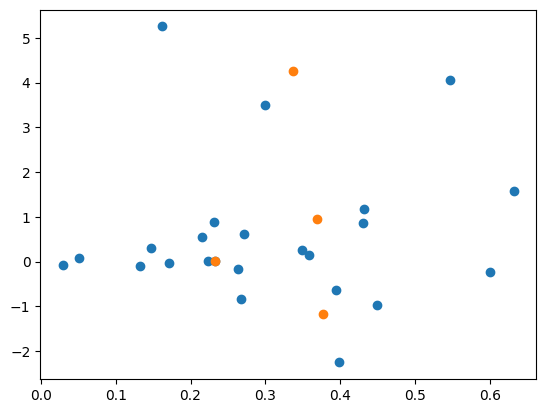

In [ ]:
km_res = KMeans(n_clusters=4).fit(combined)
km_res.cluster_centers_
 
clusters = km_res.cluster_centers_
 
plt.scatter(array1, array2)
plt.scatter(clusters[:,0], clusters[:,1])

In [ ]:
labels = km_res.labels_

In [ ]:
combined_clusters = np.column_stack((array1, 
array2, labels))

In [ ]:
combined_clusters

array([[ 6.3192e-01,  1.5750e+00,  0.0000e+00],
       [ 1.4740e-01,  3.1130e-01,  3.0000e+00],
       [ 2.2340e-01,  4.5000e-03,  3.0000e+00],
       [ 2.7090e-01,  6.0780e-01,  0.0000e+00],
       [ 3.9490e-01, -6.3530e-01,  2.0000e+00],
       [ 2.3160e-01,  8.9620e-01,  0.0000e+00],
       [ 4.3140e-01,  1.1650e+00,  0.0000e+00],
       [ 2.6340e-01, -1.5590e-01,  3.0000e+00],
       [ 3.0000e-01,  3.4950e+00,  1.0000e+00],
       [ 1.7110e-01, -2.6300e-02,  3.0000e+00],
       [ 2.3230e-01,  2.3400e-02,  3.0000e+00],
       [ 4.4930e-01, -9.7690e-01,  2.0000e+00],
       [ 5.0800e-02,  7.6200e-02,  3.0000e+00],
       [ 3.4930e-01,  2.6670e-01,  3.0000e+00],
       [ 1.6170e-01,  5.2530e+00,  1.0000e+00],
       [ 2.6740e-01, -8.2710e-01,  2.0000e+00],
       [ 1.3220e-01, -9.9100e-02,  3.0000e+00],
       [ 5.9990e-01, -2.2190e-01,  3.0000e+00],
       [ 3.9890e-01, -2.2530e+00,  2.0000e+00],
       [ 2.1560e-01,  5.5900e-01,  0.0000e+00],
       [ 3.5850e-01,  1.5100e-01,  3.000

In [ ]:
df_combined_clusters = pd.DataFrame(combined_clusters)
df_combined_clusters.columns = ['average weekly returns', 'volatility', 'cluster label']
df_combined_clusters.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_combined_clusters['cluster label'] = df_combined_clusters['cluster label'].astype(int)
df_combined_clusters.dtypes

average weekly returns    float64
volatility                float64
cluster label               int64
dtype: object

In [ ]:
df_combined_clusters

,average weekly returns,volatility,cluster label
0,0.63192,1.5750,0
1,0.14740,0.3113,3
2,0.22340,0.0045,3
3,0.27090,0.6078,0
4,0.39490,-0.6353,2
5,0.23160,0.8962,0
6,0.43140,1.1650,0
7,0.26340,-0.1559,3
8,0.30000,3.4950,1
9,0.17110,-0.0263,3


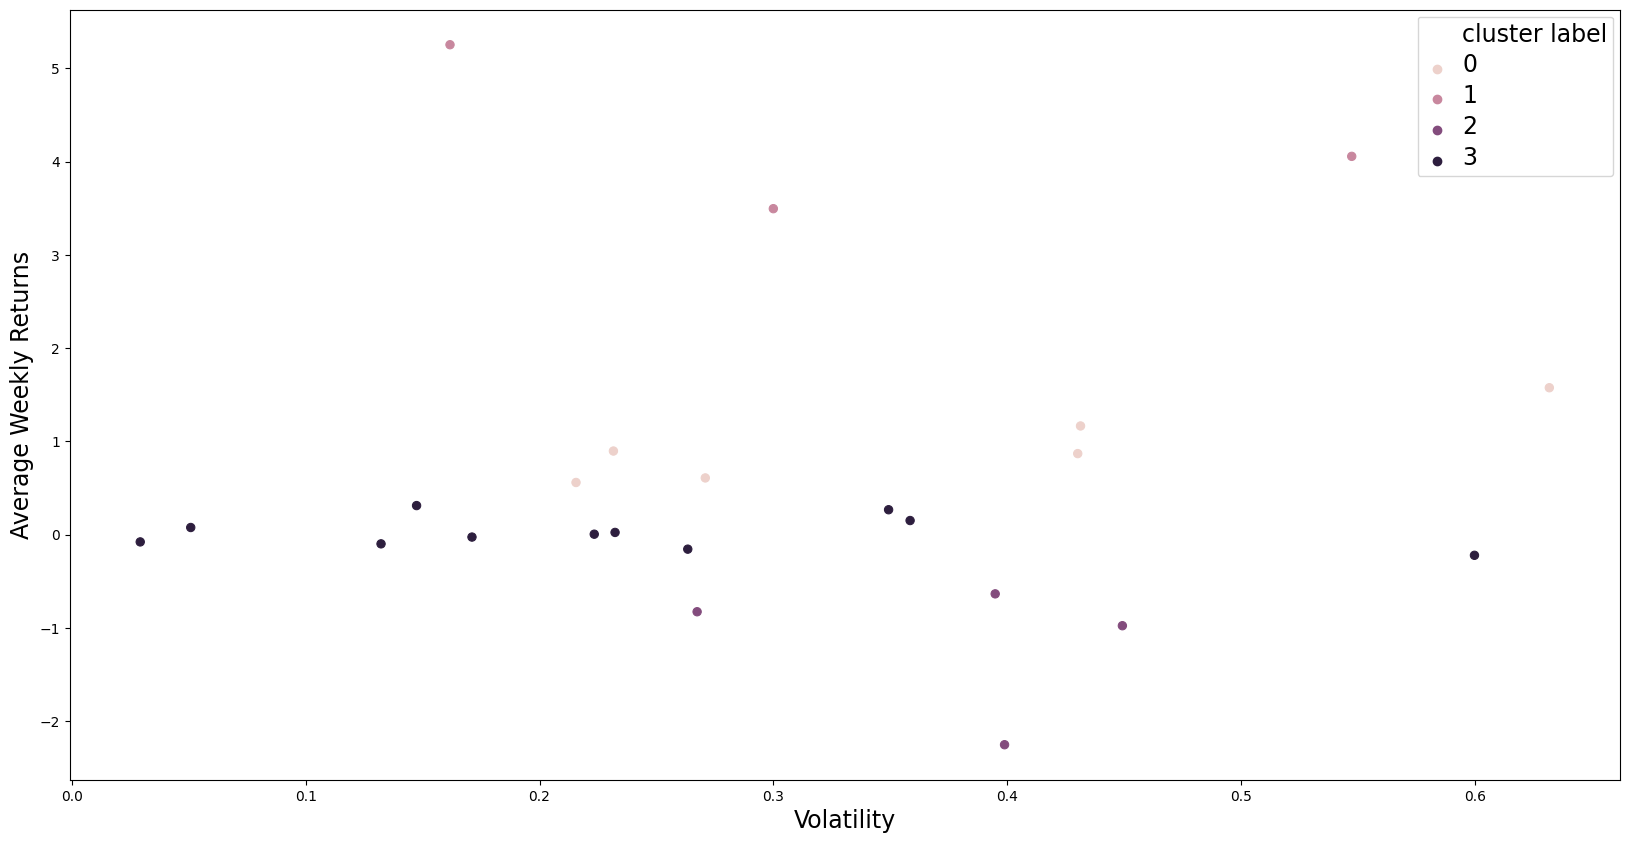

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(x="average weekly returns", y="volatility", edgecolor='face', hue="cluster label",
                     data=df_combined_clusters)
plt.xlabel('Volatility', size=17)
plt.ylabel('Average Weekly Returns', size=17)
plt.setp(ax.get_legend().get_texts(), fontsize='17') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='17') # for legend title
plt.savefig('scatterplot', dpi=300)

In [ ]:
SSE = []
for cluster in range(1,20):
    km_res = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    km_res.fit(combined)
    SSE.append(km_res.inertia_)

Text(0, 0.5, 'Inertia')

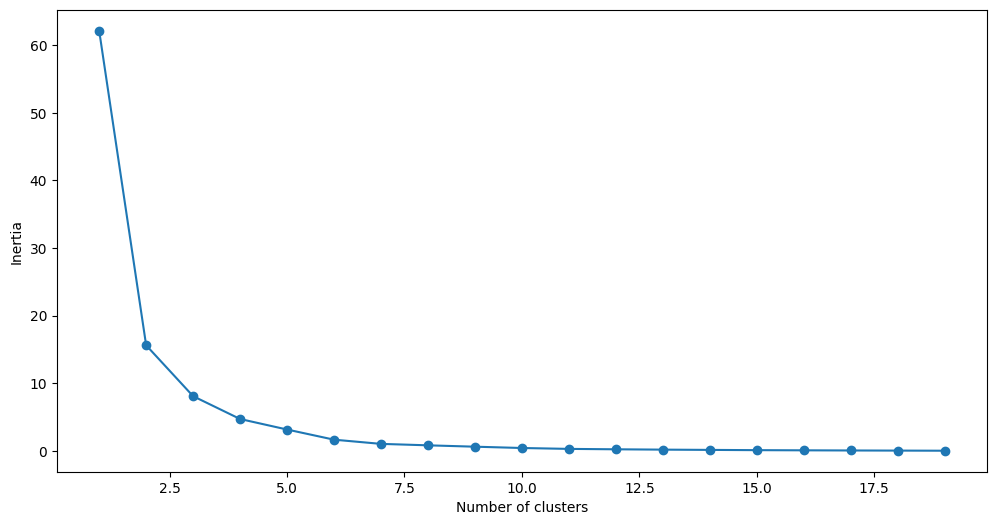

In [ ]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')